# **Creating a K-means Clustering Algorithm to group customers of a retail store based on their purchase history.**

## **Importing the Drive and mounting it.**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the Dataset from **Google Drive** which was recommended and **Setting the Directory**.

In [10]:
import pandas as pd
import os
data_directory = '/content/drive/MyDrive/Task-2_dataset'
dataset = pd.read_csv(os.path.join(data_directory, 'Mall_Customers.csv'))


### **Checking the Dataset and getting the first five rows of the Dataset.**

In [11]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Getting the Information of the **DATASET**

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **Shape of the Dataset.**

In [13]:
dataset.shape

(200, 5)

### **Checking if there is any VACANT place in the DATASET.**

In [14]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### As we see the **DATASET is not having any VACANT place**. Moving to the next step by **declaring these Columns into a new variable 'X'.**

In [15]:
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

### Now, **implementing the Elbow Method** to **determine the optimal number of clusters (k) for K-Means clustering.**

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Now, **Let's visualize the Elbow Method**, this will help in **determine the optimal number of clusters (k) for K-Means clustering.**

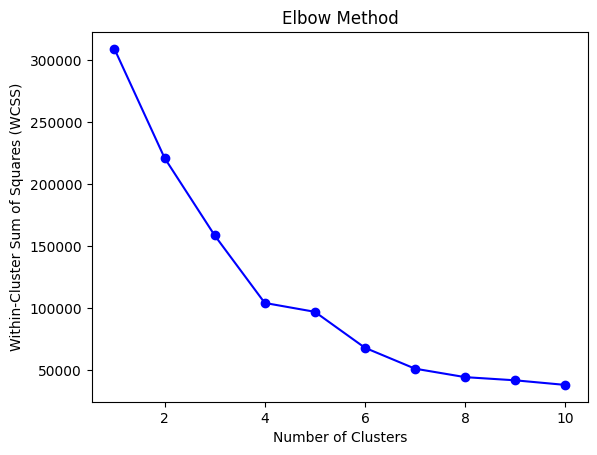

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker="o", color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

### Let's now **perform K-Means clustering with 5 clusters** on dataset X and **assign each data point to a cluster**.

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

### Adding this **'Clusters' column** into the **Dataset**.

In [19]:
dataset['Cluster'] = clusters

### **Let's Visualize the clusters formed using K-means Clustering** on a DATASET, where **customers are grouped based on their Annual Income And Spending Score**.

<ipython-input-20-d7ff44ec3654>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],


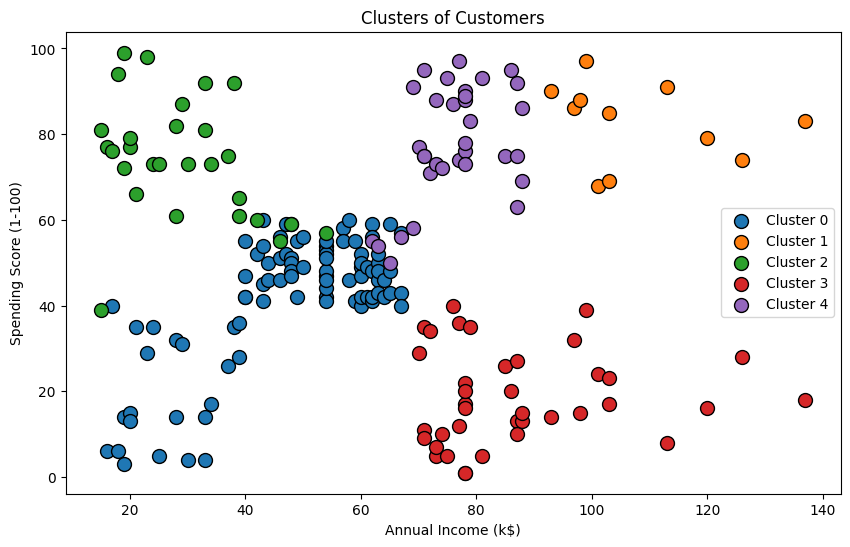

In [20]:
plt.figure(figsize=(10, 6))

for cluster_num in range(5):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_num}', cmap='viridis', marker='o', edgecolors='black', s=100)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Now our **model is ready**, Let's take **user input their own details (age, income, and spending score)** and **determines which customer cluster they belong to using the trained K-Means model.**



In [21]:
age = float(input("Enter customer's age: "))
income = float(input("Enter customer's annual income (in k$): "))
spending_score = float(input("Enter customer's spending score (1-100): "))

user_data = pd.DataFrame({'Age': [age], 'Annual Income (k$)': [income], 'Spending Score (1-100)': [spending_score]})

user_cluster = kmeans.predict(user_data)[0]
print("The user's data belongs to Cluster:", user_cluster)

Enter customer's age: 35
Enter customer's annual income (in k$): 10000
Enter customer's spending score (1-100): 50
The user's data belongs to Cluster: 1


**Got the output.**